In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy import stats
from scipy.stats import probplot
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("BTC-USD.csv")
data = data.dropna()
data[2570:]

,Date,Open,High,Low,Close,Adj Close,Volume
2574,10/4/21,48208.90625,49456.77734,47045.00391,49112.90234,49112.90234,3.338317e+10
2575,10/5/21,49174.96094,51839.98438,49072.83984,51514.81250,51514.81250,3.587390e+10
2576,10/6/21,51486.66406,55568.46484,50488.19141,55361.44922,55361.44922,4.903473e+10
2577,10/7/21,55338.62500,55338.62500,53525.46875,53805.98438,53805.98438,3.680786e+10
2578,10/8/21,53802.14453,55922.98047,53688.05469,53967.84766,53967.84766,3.480087e+10
2579,10/9/21,53929.78125,55397.94531,53735.14453,54968.22266,54968.22266,3.249121e+10
2580,10/10/21,54952.82031,56401.30469,54264.25781,54771.57813,54771.57813,3.952779e+10
2581,10/11/21,54734.12500,57793.03906,54519.76563,57484.78906,57484.78906,4.263733e+10
2582,10/12/21,57526.83203,57627.87891,54477.97266,56041.05859,56041.05859,4.108376e+10
2583,10/13/21,56038.25781,57688.66016,54370.97266,57401.09766,57401.09766,4.168425e+10


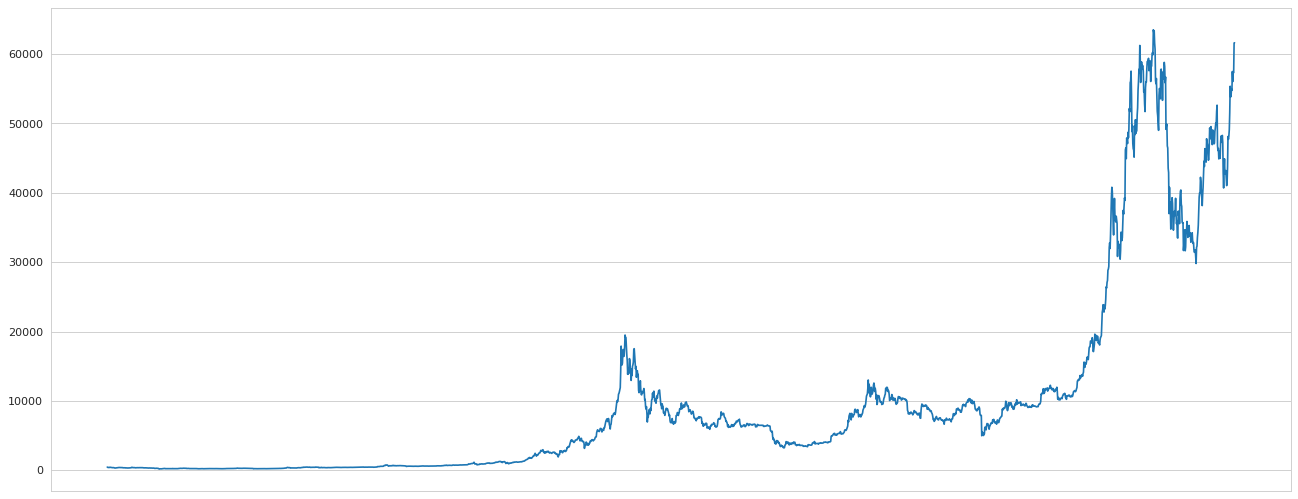

In [3]:
figure(figsize=(20, 8), dpi=80)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)

plt.plot(data['Date'], data['Close'])
plt.xticks(rotation=90)
plt.show()

# Hypothesis

H0: The closing price cannot be predicted by opening-, high-, low-price, volume and marketcap

HA: The closing price can be predicted by opening-, high-, low-price, volume and marketcap

In [4]:
model = sm.formula.ols(formula= "Close ~ High + Low + Open", data= data)
multi_reg = model.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.001e+06
Date:                Sat, 16 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:30:19   Log-Likelihood:                -18276.
No. Observations:                2583   AIC:                         3.656e+04
Df Residuals:                    2579   BIC:                         3.658e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5696      6.836      0.083      0.9

In [5]:
# 2587

In [6]:
model = sm.formula.ols(formula= "Close ~ High + Low + Open", data= data)
multi_reg = model.fit()
predicted_value = multi_reg.predict()
residuals = data['Close']-predicted_value

((array([-3.46177412, -3.21541411, -3.07903128, ...,  3.07903128,
          3.21541411,  3.46177412]),
  array([-3775.61294257, -2811.3679879 , -2647.53358717, ...,
          1779.66855964,  2175.89828402,  2198.25204078])),
 (215.28668522159717, -9.356085496517391e-12, 0.7513099032482586))

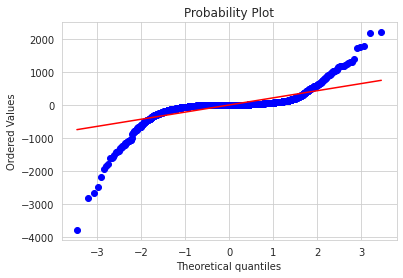

In [7]:
# plt.figure(figsize=(8,8))
# plt.subplot(121)
probplot(residuals, plot=plt)

# plt.subplot(122)
# sns.distplot(residuals, bins=100)
# plt.title("Histogram of the residuals")
# plt.xlabel("Residuals")
# plt.show()
# print("Figure 2: A probability plot (left) and a histogram (right) of the residuals of the coin_Bitcoin dataset")

<AxesSubplot:xlabel='Close', ylabel='Density'>

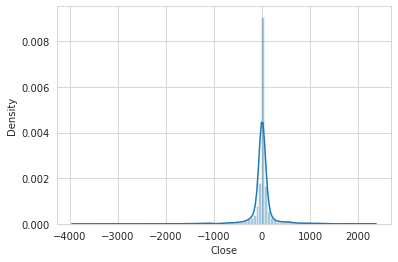

In [8]:
sns.distplot(residuals, bins=100)

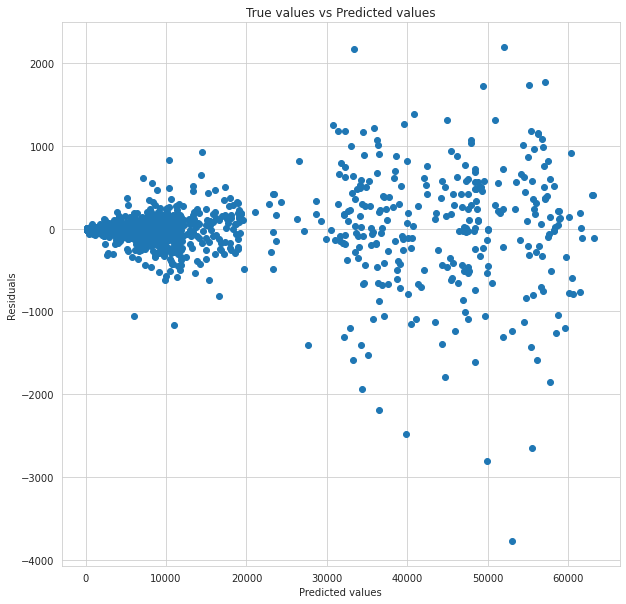

Figure 3: A scatterplot of the residuals absolute value against the true value of the data from the coin_Bitcoin dataset


In [9]:
fig, (ax1) = plt.subplots(1, figsize=(10,10))

ax1.scatter(x = predicted_value, y = residuals)
ax1.set_title("True values vs Predicted values")
ax1.set_xlabel("Predicted values")
ax1.set_ylabel("Residuals")
plt.show()
print("Figure 3: A scatterplot of the residuals absolute value against the true value of the data from the coin_Bitcoin dataset")


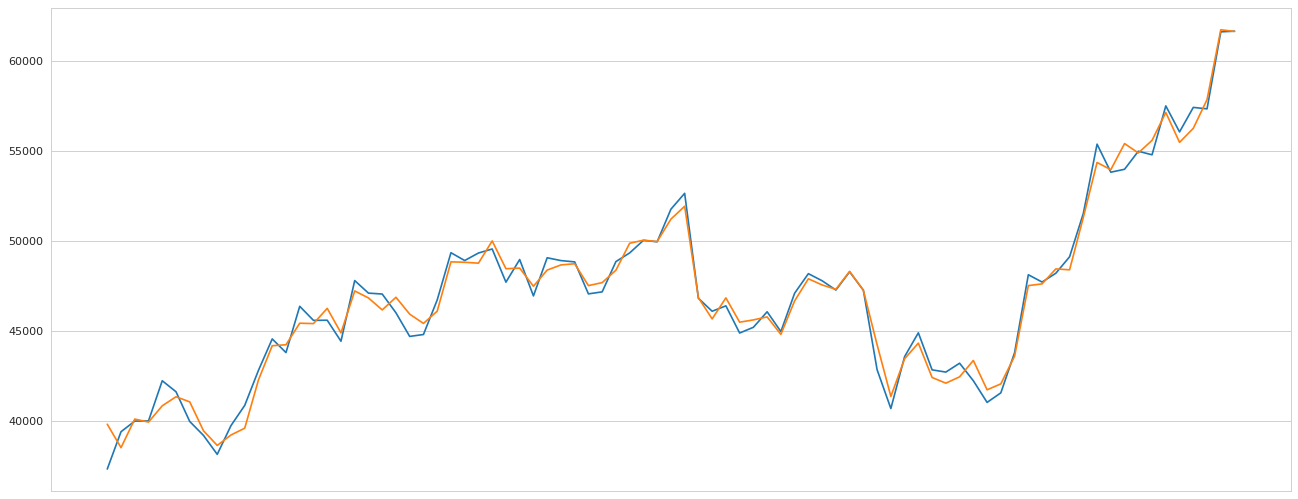

In [10]:
figure(figsize=(20, 8), dpi=80)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)

plt.plot(data['Date'][2500:], data['Close'][2500:])
plt.plot(data['Date'][2500:], predicted_value[2500:])
plt.xticks(rotation=90)
plt.show()

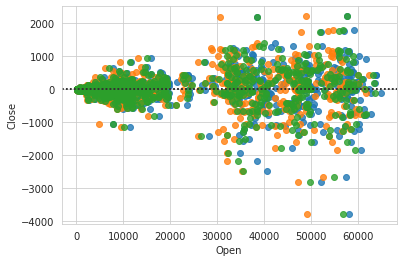

Figure 4: A scatterplot showing overlap in distribution of High, Low and Open variables in the coin_Bitcoin dataset


In [11]:
sns.residplot(x=data["High"], y=residuals)

sns.residplot(x=data["Low"], y=residuals)

sns.residplot(x=data["Open"], y=residuals)
plt.show()
print("Figure 4: A scatterplot showing overlap in distribution of High, Low and Open variables in the coin_Bitcoin dataset")